In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
print(nltk.__version__)
from nltk.tokenize import *
from wordcloud import WordCloud ,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk import jaccard_distance
from nltk import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
from IPython.display import HTML # inline
import warnings
warnings.filterwarnings("ignore")

from gensim.models import word2vec
import gensim
from nltk import ngrams
from scipy import stats
import statsmodels.api as sm

3.4.4


In [2]:
# cant install wordcloud on anaconda if youre using python 3.6+, so instead use pip
# pip install wordcloud

In [3]:
from os import listdir
from os.path import isfile, join

# Data Cleaning

In [4]:
mypath = "/home/joncauchi/Desktop/Part3/CSVfiles/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles.sort()

In [5]:
df = pd.concat(map(pd.read_csv, onlyfiles))

In [6]:
df = df.dropna() # remove rows with nan values

In [7]:
df = df.reset_index()
df

,index,Date,Property Description
0,1,"Thursday, April 23, 2015","\nProperty For Sale\n18,033 PROPERTIES for sal..."
1,2,"Thursday, April 23, 2015",\nProperty For Sale\nBALZAN. Finished large th...
2,3,"Thursday, April 23, 2015","\nProperty For Sale\nGOZO, GĦAJNSIELEM. An ide..."
3,4,"Thursday, April 23, 2015","\nProperty For Sale\nGOZO, NADUR: 3 double bed..."
4,5,"Thursday, April 23, 2015","\nProperty For Sale\nGOZO, VICTORIA: Spacious ..."
5,6,"Thursday, April 23, 2015",\nProperty For Sale\nMARSASCALA. Finished two ...
6,7,"Thursday, April 23, 2015","\nProperty For Sale\nQAWRA. Apartment, three b..."
7,8,"Thursday, April 23, 2015",\nProperty For Sale\nQAWRA. Bargain. One / two...
8,9,"Thursday, April 23, 2015",\nProperty For Sale\nSIĠĠIEWI. Three bedroom g...
9,10,"Thursday, April 23, 2015","\nProperty For Sale\nST PAUL' S BAY. Seafront,..."


In [8]:
del df['index']

In [9]:
df.head(10)

,Date,Property Description
0,"Thursday, April 23, 2015","\nProperty For Sale\n18,033 PROPERTIES for sal..."
1,"Thursday, April 23, 2015",\nProperty For Sale\nBALZAN. Finished large th...
2,"Thursday, April 23, 2015","\nProperty For Sale\nGOZO, GĦAJNSIELEM. An ide..."
3,"Thursday, April 23, 2015","\nProperty For Sale\nGOZO, NADUR: 3 double bed..."
4,"Thursday, April 23, 2015","\nProperty For Sale\nGOZO, VICTORIA: Spacious ..."
5,"Thursday, April 23, 2015",\nProperty For Sale\nMARSASCALA. Finished two ...
6,"Thursday, April 23, 2015","\nProperty For Sale\nQAWRA. Apartment, three b..."
7,"Thursday, April 23, 2015",\nProperty For Sale\nQAWRA. Bargain. One / two...
8,"Thursday, April 23, 2015",\nProperty For Sale\nSIĠĠIEWI. Three bedroom g...
9,"Thursday, April 23, 2015","\nProperty For Sale\nST PAUL' S BAY. Seafront,..."


In [10]:
df.describe()

,Date,Property Description
count,111072,111072
unique,187,80345
top,"Sunday, March 12, 2017",\nProperty For Sale\n100% FOCUSED on quality p...
freq,1426,311


In [11]:
date = []
for i in range(len(df)):
    date.append(datetime.strptime(df.iloc[:,0][i], '%A, %B %d, %Y'))
    

In [12]:
df['DATE'] = date

In [13]:
df = df.drop(['Date'],axis=1)

In [14]:
df = df.sort_values(by='DATE') ## sort in ascending order

In [15]:
df.head()

,Property Description,DATE
0,"\nProperty For Sale\n18,033 PROPERTIES for sal...",2015-04-23
60,\nProperty For Sale\nST VENERA. One bedroom fi...,2015-04-23
59,"\nProperty For Sale\nST PAUL' S BAY. Seafront,...",2015-04-23
58,\nProperty For Sale\nQAWRA. Bargain. One / two...,2015-04-23
57,\nProperty For Sale\nMARSASCALA. Finished two ...,2015-04-23


In [16]:
len(df)

111072

In [17]:
df.iloc[111060:111072] # looks good, all files have been parsed from the looks of it

,Property Description,DATE
51055,"\nProperty For Sale\nIKLIN. New on the market,...",2019-11-15
51054,\nProperty For Sale\nIKLIN. 120sqm finished ap...,2019-11-15
51053,\nProperty For Sale\nĦAMRUN. Recently renovate...,2019-11-15
51052,"\nProperty For Sale\nĦAMRUN. Ready built, grou...",2019-11-15
51051,\nProperty For Sale\nĦAMRUN. A well kept tradi...,2019-11-15
51050,\nProperty For Sale\nĦAMRUN. A large old house...,2019-11-15
51049,\nProperty For Sale\nGŻIRA. Very bright corner...,2019-11-15
51048,\nProperty For Sale\nGŻIRA. Two bedroom ready ...,2019-11-15
51047,\nProperty For Sale\nGŻIRA. Modern designer fi...,2019-11-15
51046,"\nProperty For Sale\nGŻIRA. Fully furnished, t...",2019-11-15


In [18]:
df.head() # remove '\nProperty For Sale\n'

,Property Description,DATE
0,"\nProperty For Sale\n18,033 PROPERTIES for sal...",2015-04-23
60,\nProperty For Sale\nST VENERA. One bedroom fi...,2015-04-23
59,"\nProperty For Sale\nST PAUL' S BAY. Seafront,...",2015-04-23
58,\nProperty For Sale\nQAWRA. Bargain. One / two...,2015-04-23
57,\nProperty For Sale\nMARSASCALA. Finished two ...,2015-04-23


In [19]:
df.rename(columns={'DATE': 'Date', 'Property Description': 'Description'}, inplace=True)

In [20]:
df.Description = df.Description.str.replace('\nProperty For Sale\n', '')

In [21]:
df.head()

,Description,Date
0,"18,033 PROPERTIES for sale on Malta's best rat...",2015-04-23
60,ST VENERA. One bedroom finished penthouse with...,2015-04-23
59,"ST PAUL' S BAY. Seafront, new finished three b...",2015-04-23
58,QAWRA. Bargain. One / two / three bedroom mais...,2015-04-23
57,MARSASCALA. Finished two bedroom apartment clo...,2015-04-23


In [22]:
a = df.Description.str.split("€",expand=True) 

In [23]:
df['Price'] = a[1].str[:12]

#### We have now extracted the prices, we can now with a couple lines of code remove any letters from the price column and remove the rows with no info about price 

In [24]:
df.head(300)

,Description,Date,Price
0,"18,033 PROPERTIES for sale on Malta's best rat...",2015-04-23,None
60,ST VENERA. One bedroom finished penthouse with...,2015-04-23,"94,000. Phon"
59,"ST PAUL' S BAY. Seafront, new finished three b...",2015-04-23,"250,000. Pho"
58,QAWRA. Bargain. One / two / three bedroom mais...,2015-04-23,"75,500 on pl"
57,MARSASCALA. Finished two bedroom apartment clo...,2015-04-23,"85,000. Phon"
56,"GOZO, QALA. Four roomed unconverted farmhouse ...",2015-04-23,"90,000. Phon"
55,"GOZO, NADUR. Priced to sell plot of land suita...",2015-04-23,"80,000. Phon"
54,"GOZO, GĦAJNSIELEM. Elevated groundfloor apartm...",2015-04-23,"90,500. Phon"
53,"BALZAN. Finished, large three bedroom apartmen...",2015-04-23,"152,000. Pho"
52,"18,033 PROPERTIES for sale on Malta' s best ra...",2015-04-23,None


In [25]:
df = df.reset_index()

### Typos

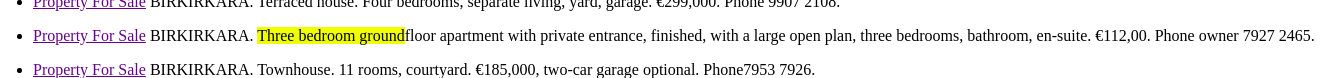

In [26]:
from IPython.display import Image
Image(filename='priceerror.png')

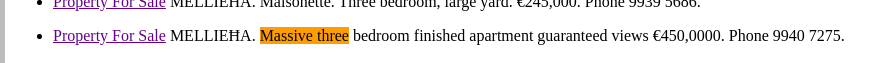

In [27]:
Image(filename='priceerror2.png')

### A downside of our data extraction strategy

Our strategy is to split the description at the point we meet the euro currency symbol. The problem with this is that some listings mention multiple prices as the one below

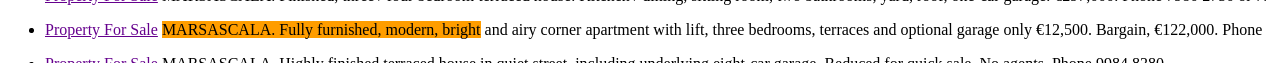

In [28]:
Image(filename='downside.png')

This apartment is obviously at 122k price but the code is extracting the 12.5k price which describes the garage only.

In [29]:
# remove all non numeric characters from price column
df['Price'] = df.Price.str.replace(r"[a-zA-Z]",'')

In [30]:
df['Price'] = df.Price.str.replace(' ', '')

In [31]:
df['Price'] = df.Price.str.replace('Ż', '')

In [32]:
df['Price'] = df.Price.str.replace(',0000.', ',000.')

In [33]:
df['Price'] = df.Price.str.replace(',00.', ',000.')


In [34]:
df['Price'] = df.Price.str.replace('Ħ', '')
df['Price'] = df.Price.str.replace('ħ', '')

In [35]:
df['Price'] = df.Price.str.replace('ġ', '')


In [36]:
df['Price'] = df.Price.str.rstrip()

In [37]:
df['Price'] = df.Price.str.replace('_', '')

In [38]:
df["Price"] = df['Price'].str.replace('[^\w\s]','')
len(df)

111072

In [39]:
df = df.dropna() # dropping rows with 'None' values
len(df)

97237

In [40]:
df["Price"] = pd.to_numeric(df["Price"]) #converting from str to int

In [41]:
df = df[df['Price'] > 10000] #taking only property listings where price is higher than 10k 

In [42]:
df = df[df['Price'] < 2500000] #taking only property listings where price is less than 2.5 million

In [43]:
print("Minimum Price: ",df['Price'].min())
print("Maximum Price: ",df['Price'].max())
print("Median Price: ",df['Price'].median())
print("Mean Price: ",df['Price'].mean())

Minimum Price:  10500.0
Maximum Price:  2495000.0
Median Price:  240000.0
Mean Price:  324966.2059270675


In [44]:
df = df.reset_index()

In [45]:
a = df[['Price']].idxmin()
# lets find the index of the lsiting with the lowest price in our dataset

In [46]:
b = df[['Price']].idxmax()
# lets find the index of the listing with the highest price in our dataset

In [47]:
df.iloc[a]
# as you can see it is a one car garage in ATTARD

,level_0,index,Description,Date,Price
509,611,157,"ATTARD. One car garage, finished. €10,500. Bas...",2015-04-29,10500.0


In [48]:
df.iloc[b]
# highest prices is an apartment in tigne

,level_0,index,Description,Date,Price
85070,98116,36649,TIGNÉ POINT. New on the market is this triplex...,2018-06-13,2495000.0


In [49]:
len(df)

96034

In [50]:
df = df.drop(['level_0','index'],axis=1)

#### Around 15,000+ property listings did not have any information about price, where lower than 10k and higher than 5 million so they have been dropped. We are now working with 96k listings

# GENERAL EXPLANATORY ANALYSIS

Properties can be split into different property categories such as:
- Apartment/Studio
- Penthouse
- Villa
- Maisonette
- Farmhouse/Townhouse
- House of Character
- Plot
- Garages

The properties listed could have descriptive words such as:
- Finished/Semi-finished
- Pool
- Garage/Drive way
- Lift
- Bargain
- Views
- Garden/Yard
- Balcony/Balconies
- Luxury
- Terrace
- Ensuite
- Fireplace
- optional ...
- sqm
- cellar
- quiet

## Districts of Malta

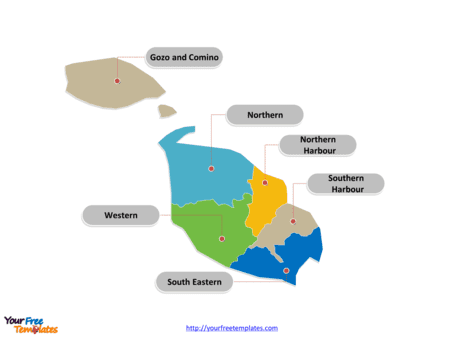

In [51]:
Image(filename='malta.png')

The country is split into 6 districts:
- Northen Harbour
- Southern Harbour
- Northern
- Western
- South Eastern
- Gozo 

View this link for further details: https://en.wikipedia.org/wiki/Districts_of_Malta

The Northern and Southern Harbours are the more densely populated areas, where the most commerce happens. Localities here include Sliema, St Julians, Valletta, Gzira, Pieta, Birkirkara, etc. A property type, lets say an apartment of a certain size with certain features will undoubtedly be more expensive here compared to similar properties from other districts in the country.

# Naqa NLP, sieħbej

### Word Cloud of Property Descriptions

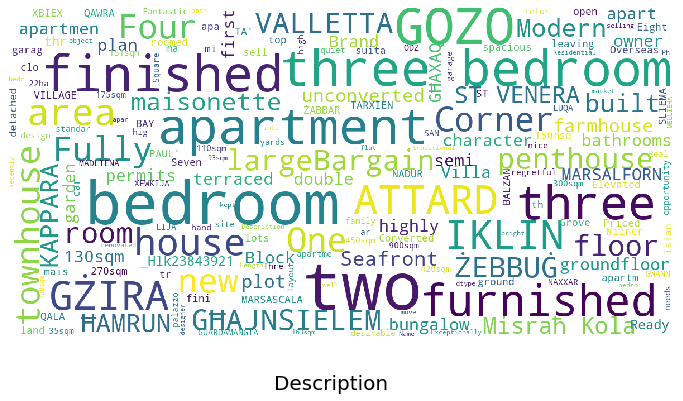

In [52]:
def show_wordcloud(data, title = None):
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=250,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(df['Description'],'Description')

### Most influential words in Description

In [53]:
#nltk.download('wordnet')

In [54]:
desp=' '.join(text for text in df['Description'])

In [55]:
lem=WordNetLemmatizer()
text=[lem.lemmatize(w) for w in word_tokenize(desp)]
vect=TfidfVectorizer(ngram_range=(1,3),max_features=100)
vectorized_data=vect.fit_transform(text)
#id_map=dict((v,k) for k,v in vect.vocabulary_.items())
vect.vocabulary_.keys()

KeyboardInterrupt: 

### Corpus creation w/ Word 2 Vec

In [56]:
def build_corpus(df,col):
    
    lem=WordNetLemmatizer()
    corpus= []
    for x in df[col]:
        
        
        words=word_tokenize(x)
        corpus.append([lem.lemmatize(w) for w in words])
    return corpus

corpus=build_corpus(df,'Description')
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=500, workers=4)


In [183]:
model.wv.most_similar('view')

[('distant', 0.26248064637184143),
 ('overlooking', 0.19773386418819427),
 ('0827', 0.19319604337215424),
 ('bungalow', 0.18907004594802856),
 ('facing', 0.17335495352745056),
 ('Designer', 0.1709957718849182),
 ('plan', 0.16859754920005798),
 ('spacious', 0.16403591632843018),
 ('IĊ-ĊAGĦAQ', 0.161830872297287),
 ('large', 0.16020160913467407)]

In [184]:
model.wv.most_similar('spacious')

[('large', 0.7059009075164795),
 ('Spacious', 0.4653055667877197),
 ('squarish', 0.43050840497016907),
 ('nice', 0.40374547243118286),
 ('good', 0.38578125834465027),
 ('an', 0.3845052719116211),
 ('Large', 0.3619663715362549),
 ('lovely', 0.31659650802612305),
 ('Front', 0.2911252975463867),
 ('main', 0.2907837927341461)]

### Text similarities

In [227]:
def similar_jobs(job):
    word1=word_tokenize(job)
    jobs=[]
    for i,name in enumerate(df['Description']):
        word2=word_tokenize(name)
        distance=jaccard_distance(set(ngrams(word1,n=1)),set(ngrams(word2,n=1)))
        if(distance<.55):
            jobs.append((name,i))
    return jobs

In [233]:
df = df.set_index('index')

In [239]:
df['Description'][20] #lets say i really like this listing and i want to find similar listings

'ATTARD. Block of two. Fully furnished three bedroom apartment. Large washroom on own part of roof, three-car garage. €220,000. Phone 7900 5544.'

In [240]:
similar_jobs(df['Description'][20])

[('ATTARD. Block of two. Fully furnished three bedroom apartment. Large washroom on own part of roof, three-car garage. €220,000. Phone 7900 5544.',
  20),
 ('ATTARD. Fully furnished, three bedroom apartment, block of two. Part roof, three-car garage. €210,000. Phone 7900 5544.',
  10199),
 ('ATTARD. Fully furnished, three bedroom apartment, block of two, with part roof, three-car garage. €210,000. Phone 7900 5544.',
  10870),
 ('ATTARD. Fully furnished, three bedroom apartment, block of two, owns part roof, three-car garage. €210,000. Phone 7900 5544.',
  12801)]

# What do with the corpus?

- Plot an TSNE (t-Distributed Stochastic Neighbor Embedding) Model to see the similarities between words
- Remove stopping words and break down each description into a sequence of descriptive words, such as spacious, views, etc
- You can rank the importance of each descriptive words (by its frequency) or you can cluster listings to see which listings are similar to each other
- You can build a chatbot that can recommend property listings via a particular user string, e.g: tokenize user input, etc
- You can use the data to train ML models for price prediction or category classification

Considering this is not an NLP course, we'll stop here

### Common Property Listings

In [118]:
df_apartments = df[df['Description'].str.contains("apartment|Apartment")]
df_penthouse = df[df['Description'].str.contains("penthouse|Penthouse")]
df_villa = df[df['Description'].str.contains("villa|Villa")]
df_house = df[df['Description'].str.contains("house|House")]
df_maisonette = df[df['Description'].str.contains("maisonette|Maisonette")]
df_farmhouse = df[df['Description'].str.contains("farmhouse|Farmhouse")]
df_hoc = df[df['Description'].str.contains("house of character|House of character")]
df_townhouse = df[df['Description'].str.contains("townhouse|Townhouse")]

In [119]:
data = [['Apartment', len(df_apartments)],['Penthouse',len(df_penthouse)],['Villa', len(df_villa)], ['House', len(df_house)],['Maisonette', len(df_maisonette)],['Farmhouse', len(df_farmhouse)],['HOC',len(df_hoc)],['Townhouse',len(df_townhouse)]] 
count_df = pd.DataFrame(data, columns = ['Listing', 'Count'])
count_df

,Listing,Count
0,Apartment,42007
1,Penthouse,11936
2,Villa,4206
3,House,30355
4,Maisonette,15626
5,Farmhouse,1268
6,HOC,5279
7,Townhouse,5666


Text(0.5, 0, 'Count')

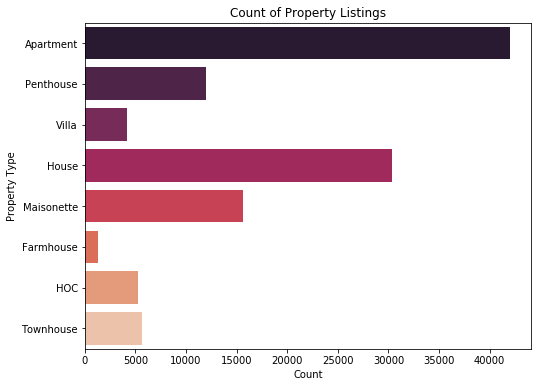

In [120]:
plt.figure(figsize=(8,6))
sns.barplot(count_df['Count'],count_df['Listing'],palette='rocket')                                          
plt.title('Count of Property Listings')
plt.ylabel("Property Type")
plt.xlabel('Count')

- We can see that **apartment** and **house** listings dominate the real estate market

- It might be a good idea to seperately analyze house and apartment listings later on

### What do listings higher than 1 million euro have in common?

In [121]:
df_million = df[df['Price'] > 1000000] #ex

Text(0.5, 0, 'Count')

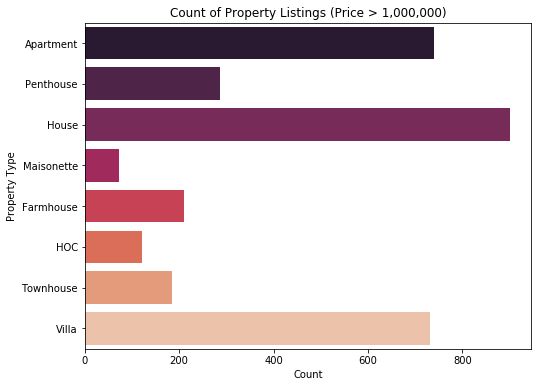

In [122]:

dfmil_apart = df_million[df_million['Description'].str.contains("apartment|Apartment")]
dfmil_house = df_million[df_million['Description'].str.contains("house|House")]
dfmil_penthouse = df_million[df_million['Description'].str.contains("penthouse|Penthouse")]
dfmil_maison = df_million[df_million['Description'].str.contains("maisonette|Maisonette")]
dfmil_farm = df_million[df_million['Description'].str.contains("farmhouse|Farmhouse")]
dfmil_town = df_million[df_million['Description'].str.contains("townhouse|Townhouse")]
dfmil_hoc = df_million[df_million['Description'].str.contains("house of character|House of character")]
dfmil_villa = df_million[df_million['Description'].str.contains("villa|Villa")]

datamil = [['Apartment', len(dfmil_apart)],['Penthouse',len(dfmil_penthouse)], ['House', len(dfmil_house)],['Maisonette', len(dfmil_maison)],['Farmhouse', len(dfmil_farm)],['HOC',len(dfmil_hoc)],['Townhouse',len(dfmil_town)],['Villa',len(dfmil_villa)]] 
countmil_df = pd.DataFrame(datamil, columns = ['Listing', 'Count'])
plt.figure(figsize=(8,6))
sns.barplot(countmil_df['Count'],countmil_df['Listing'],palette='rocket')                                          
plt.title('Count of Property Listings (Price > 1,000,000)')
plt.ylabel("Property Type")
plt.xlabel('Count')

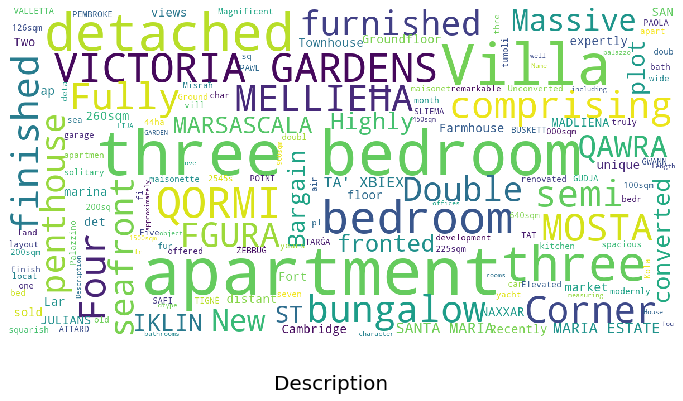

In [123]:
#word cloud again
show_wordcloud(df_million['Description'],'Description')

#### How are these listings scattered around Malta & Gozo?

In [124]:
dfmil_gozo = df_million[df_million['Description'].str.contains("GOZO")]

cmil_gozo = len(dfmil_gozo)
cmil_malta = len(df_million)-cmil_gozo

print("Gozo properties over 1 million count: ",cmil_gozo)
print("Malta properties over 1 million count: ",cmil_malta)

Gozo properties over 1 million count:  26
Malta properties over 1 million count:  3230


#### Price Distribution of properties over 1 million euro and less than 5 million

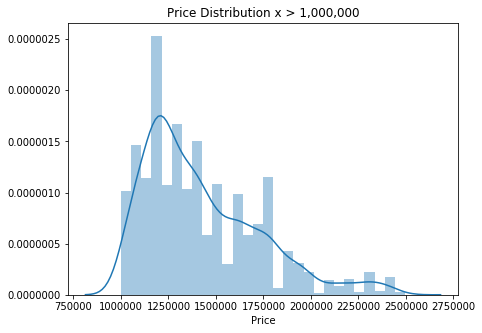

In [125]:
plt.figure(figsize=(7,5))
sns.distplot(df_million['Price'])
plt.title('Price Distribution x > 1,000,000')
plt.show()

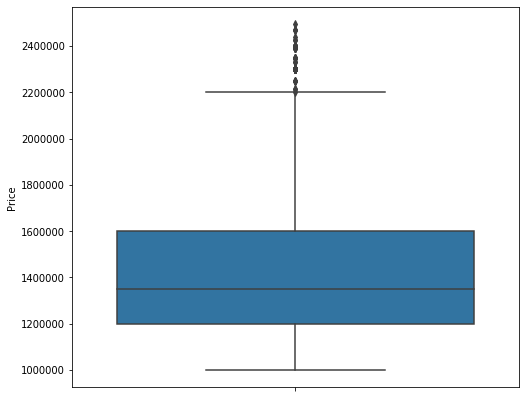

In [126]:
plt.figure(figsize=(8,7))
sns.boxplot( y=df_million["Price"] )  # use plotly

The majority of these property listings fall between 1 to 1.5 million euro. 3rd quartile range falls at around 2.2 million, anything beyond that is considered an outlier

### Pick a reasonable price range, extract listings that fall into this price range. What do they have in common?

Lets fetch property listings that fall into the 120k-500k range. The mean falls into this range

In [127]:
df_r1 = df[df['Price'] > 120000] 
df_avg = df_r1[df_r1['Price'] < 500000] 

Text(0.5, 0, 'Count')

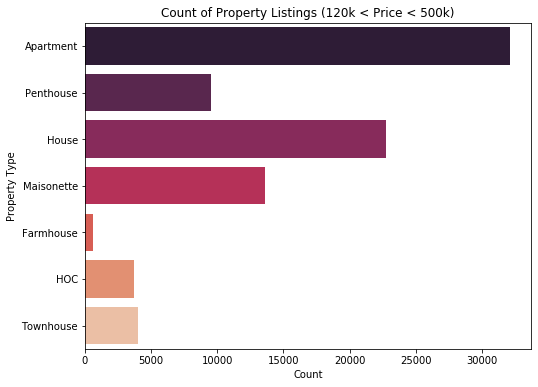

In [128]:
# return all propertly listing types, and visualize
dfavg_apart = df_avg[df_avg['Description'].str.contains("apartment|Apartment")]
dfavg_house = df_avg[df_avg['Description'].str.contains("house|House")]
dfavg_penthouse = df_avg[df_avg['Description'].str.contains("penthouse|Penthouse")]
dfavg_maison = df_avg[df_avg['Description'].str.contains("maisonette|Maisonette")]
dfavg_farm = df_avg[df_avg['Description'].str.contains("farmhouse|Farmhouse")]
dfavg_town = df_avg[df_avg['Description'].str.contains("townhouse|Townhouse")]
dfavg_hoc = df_avg[df_avg['Description'].str.contains("house of character|House of character")]
data = [['Apartment', len(dfavg_apart)],['Penthouse',len(dfavg_penthouse)], ['House', len(dfavg_house)],['Maisonette', len(dfavg_maison)],['Farmhouse', len(dfavg_farm)],['HOC',len(dfavg_hoc)],['Townhouse',len(dfavg_town)]] 
countavg_df = pd.DataFrame(data, columns = ['Listing', 'Count'])
plt.figure(figsize=(8,6))
sns.barplot(countavg_df['Count'],countavg_df['Listing'],palette='rocket')                                          
plt.title('Count of Property Listings (120k < Price < 500k)')
plt.ylabel("Property Type")
plt.xlabel('Count')


### Price Distribution

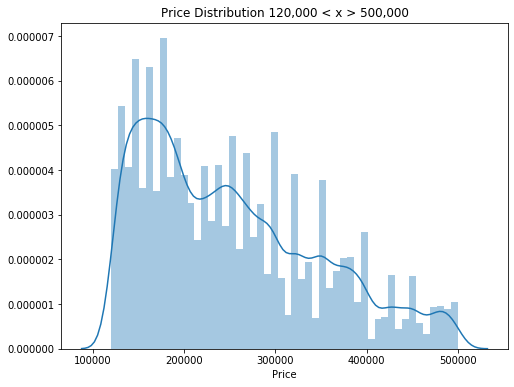

In [129]:
plt.figure(figsize=(8,6))
sns.distplot(df_avg['Price'])
plt.title('Price Distribution 120,000 < x > 500,000')
plt.show()

No surprise here as the majority of the listings in our 'reasonable' price range is mostly dominated by apartments, penthouses, houses and maisonettes. Most listings at this range start off at 170k - 180k

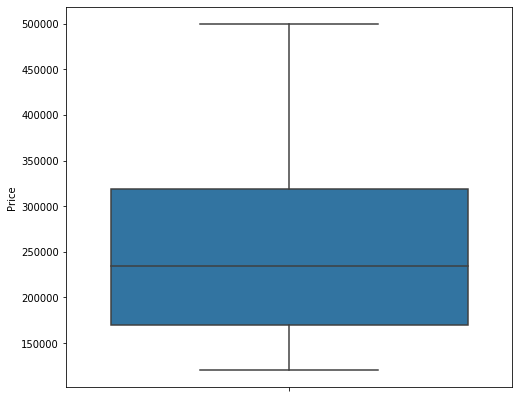

In [130]:
plt.figure(figsize=(8,7))
sns.boxplot( y=df_avg["Price"] )  # use plotly

### How many listings are in Gozo & Malta at this price range

In [131]:
dfavg_GOZO = df_avg[df_avg['Description'].str.contains("GOZO")] #extracting finish

In [132]:
gozoavgcnt = len(dfavg_GOZO)
print("Number of listings in Gozo between €120k and €500k is:", len(dfavg_GOZO))
diff = len(df_avg) - len(dfavg_GOZO)
print("Number of listings in Malta between €120k and €500k is:", diff)

Number of listings in Gozo between €120k and €500k is: 4415
Number of listings in Malta between €120k and €500k is: 66244


### Which week in our dataset contains the most listings?

In [133]:
#group data by date, count listings by date
df_date = df


In [134]:
#df_date.set_index('Date', inplace=True)
df_date = df_date.sort_index()
frequency = df_date.index.value_counts()
print("Frequency of value in Index of Dataframe :")
print(frequency)

Frequency of value in Index of Dataframe :
5     10931
10     9722
3      9452
6      9394
8      9034
4      9015
7      7380
11     7251
9      6695
2      6314
1      6216
12     4630
Name: month, dtype: int64


#### What about the year?

In [135]:
df = df.reset_index()

ValueError: cannot insert month, already exists

In [136]:
df_date['year'] = pd.DatetimeIndex(df['Date']).year
df_date.set_index('year', inplace=True)
df_date.drop(['Description'],axis=1)
frequency = df_date.index.value_counts()
print("Frequency of value in Index of Dataframe :")
print(frequency)

Frequency of value in Index of Dataframe :
2016    28594
2018    25585
2017    20855
2015    20284
2019      716
Name: year, dtype: int64


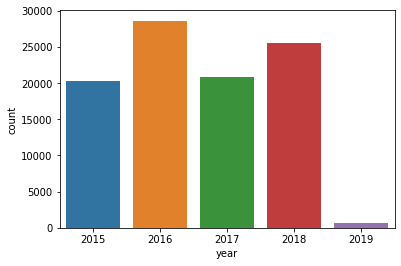

In [137]:
df_date['year'] = pd.DatetimeIndex(df['Date']).year
sns.countplot(x='year', data=df_date)

2016 & 2018 were the hotter years in terms of listing numbers

#### What about the month?

In [138]:
df_month = df
df_month['month'] = pd.DatetimeIndex(df['Date']).month
df_month.set_index('month', inplace=True)
df_month.drop(['Description', 'Date'],axis=1)
frequency = df_month.index.value_counts()
print("Frequency of value in Index of Dataframe :")
print(frequency)

Frequency of value in Index of Dataframe :
5     10931
10     9722
3      9452
6      9394
8      9034
4      9015
7      7380
11     7251
9      6695
2      6314
1      6216
12     4630
Name: month, dtype: int64


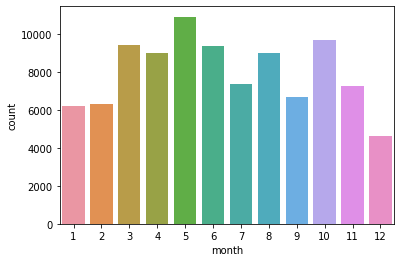

In [139]:
df_month['month'] = pd.DatetimeIndex(df['Date']).month
sns.countplot(x='month', data=df_month)

Winter time seems to be a bit inactive compared to other seasons. Why?

### Explanatory Analysis - Northern Harbour

Localities of Northern Harbour are split as follows:

- BIRKIRKARA 
- GŻIRA
- ĦAMRUN
- MSIDA
- PEMBROKE
- PIETÁ 
- GUARDAMANGIA
- QORMI 
- ST JULIANS 
- SAN ĠWANN
- ST VENERA
- SLIEMA
- SWIEQI
- SWATAR
- TA' XBIEX
- TIGNÉ POINT

In [140]:
df_north = df[df['Description'].str.contains("BIRKIRKARA|QORMI|GŻIRA|ĦAMRUN|MSIDA|PEMBROKE|PIETÁ|GUARDAMANGIA|ST JULIANS|SAN ĠWANN|ST VENERA|SLIEMA|SWIEQI|SWATAR|TA' XBIEX|TIGNÉ POINT")]

Text(0.5, 0, 'Count')

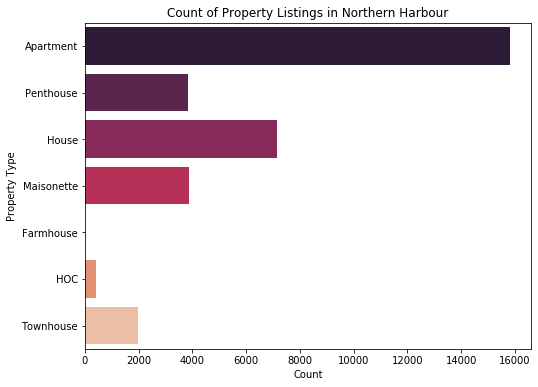

In [141]:
dfnorth_apart = df_north[df_north['Description'].str.contains("apartment|Apartment")]
dfnorth_house = df_north[df_north['Description'].str.contains("house|House")]
dfnorth_penthouse = df_north[df_north['Description'].str.contains("penthouse|Penthouse")]
dfnorth_maison = df_north[df_north['Description'].str.contains("maisonette|Maisonette")]
dfnorth_farm = df_north[df_north['Description'].str.contains("farmhouse|Farmhouse")]
dfnorth_town = df_north[df_north['Description'].str.contains("townhouse|Townhouse")]
dfnorth_hoc = df_north[df_north['Description'].str.contains("house of character|House of character")]
datanorth = [['Apartment', len(dfnorth_apart)],['Penthouse',len(dfnorth_penthouse)], ['House', len(dfnorth_house)],['Maisonette', len(dfnorth_maison)],['Farmhouse', len(dfnorth_farm)],['HOC',len(dfnorth_hoc)],['Townhouse',len(dfnorth_town)]] 
countnorth_df = pd.DataFrame(datanorth, columns = ['Listing', 'Count'])
plt.figure(figsize=(8,6))
sns.barplot(countnorth_df['Count'],countnorth_df['Listing'],palette='rocket')                                          
plt.title('Count of Property Listings in Northern Harbour')
plt.ylabel("Property Type")
plt.xlabel('Count')


No farmhouses in Northern Harbour, which makes sense as it is not a very rural area. Mostly apartments and houses

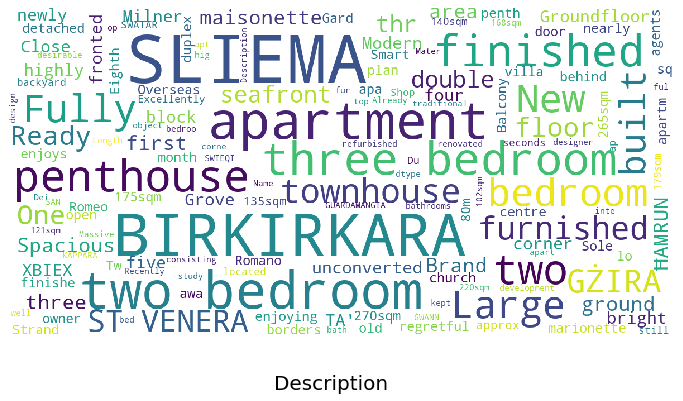

In [142]:
show_wordcloud(df_north['Description'],'Description')

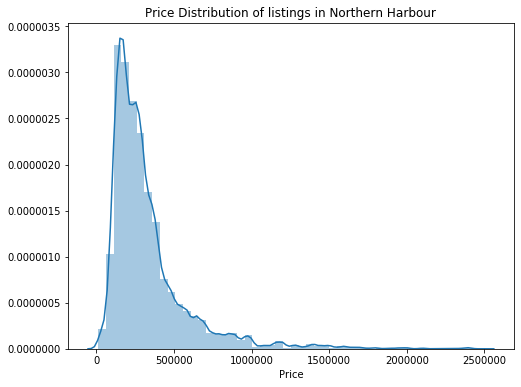

In [143]:
plt.figure(figsize=(8,6))
sns.distplot(df_north['Price'])
plt.title('Price Distribution of listings in Northern Harbour')
plt.show()

### Outliers

An outlier is an observation that appears to deviate markedly from other observations in the sample. An outlier may indicate bad data. For example, the data may have been inputted incorrectly or an experiment may not have been run correctly. 
If it can be determined that a data point is in fact erroneous, then the value should be deleted from the analysis (or corrected if possible).

In some cases, it may not be possible to determine if an outlying point is bad data. Outliers may be due to random variation or may indicate something scientifically interesting. In any event, we should not  simply delete the outlying observation before a through investigation. If we were to plot a boxplot of the price variation of original untouched dataset, the number of outliers would be significant, which would imply our dataset is untrustworthy. However we can break our dataset into smaller specialized datasets and we can examine those smaller samples indvidually

### Lets assume, I want to buy a 2/3 bedroom apartment in Malta in the Northen Harbour region. I will want to look at the data of all the listings including other features such as lift, garden, views etc and their impact on the pricing. Lets also consider I'm not a millionaire (which im not ), so extreme outliers will be ignored. We have seen prior that luxurious 3 bedroom apartments in Sliema can skyrocket to a multi million euro price tag which is not what I am looking for

### Even when analyzing only 3 bedroom apartments, there may still be a large variance in prices. Features play a  large role in final price decisions so it is crucial we specify some extra features.  We should also try to see the fluctuation of prices along the years to see if properties of our specified type have been increasing in price or not

We should ask ourselves, what are we looking for? Lets look for 2/3 bedroom apartments/penthouses in the Northern Harbour, either finished or semi-finished, locality matters not as long as it is in the Northen Harbour district. Our budget is not more than 500k

### Finished/Furnished 2/3 bedroom APARTMENTS/PENTHOUSES in Northern Harbour

In [144]:
df_finished = df_north[df_north['Description'].str.contains("apartment|penthouse")]
df_finished = df_finished[df_finished['Description'].str.contains("three bedroom|Three bedroom|two bedroom|Two bedroom")]
df_finished = df_finished[df_finished['Description'].str.contains("furnished|finished")]


In [145]:
df_finished = df_finished[df_finished['Price']<500000]
#df_finished = df_finished.drop(['index','month'], axis=1)

In [146]:
df_finished = df_finished[df_finished['Price']>50000] # any price below this is unrealistic or describes only the garage price

In [147]:
df_finished.shape

(5172, 5)

In [148]:
df_finished['Price'].min()

65000.0

In [149]:
df_finished['Price'].max()

499000.0

### The 30 cheapest 2/3 bedroom finished apartments in Northern Harbour

In [150]:
#lets check the 30 cheapest apartment prices
least30 = df_finished.nsmallest(30, "Price") 
least30

,index,Description,Date,Price,month
month,,,,,
1,50467,"BIRKIRKARA, old church area. New, selling from...",2017-01-24,65000.0,1
4,80457,"SAN ĠWANN. Newly built, luxury, large one bedr...",2018-04-30,78000.0,4
5,80612,"SAN ĠWANN. Newly built, luxury, large one bedr...",2018-05-02,78000.0,5
4,387,"BIRKIRKARA. Three bedroom shell apartments, en...",2015-04-29,79500.0,4
7,6742,"BIRKIRKARA. Three bedroom shell apartments, en...",2015-07-15,79500.0,7
1,21679,"BIRKIRKARA. Shell apartment. Three bedrooms, c...",2016-01-18,79500.0,1
5,2258,"TARXIEN / PAOLA. Groundfloor maisonette,104sqm...",2015-05-26,80000.0,5
6,4489,GŻIRA. One / two bedroom apartment close to al...,2015-06-17,80000.0,6
6,2900,ST VENERA. Three bedroom fully furnished apart...,2015-06-03,83500.0,6


In [151]:
#lets check the 30 most expensive apartment prices that are not higher than 500k
most30 = df_finished.nlargest(30, "Price") 
most30

,index,Description,Date,Price,month
month,,,,,
10,92634,"ST JULIANS, Balluta. UK owners selling duplex ...",2018-10-08,499000.0,10
10,93255,"ST JULIANS, Balluta. UK owners selling duplex ...",2018-10-09,499000.0,10
3,73584,ST JULIANS. Three bedroom finished and partly ...,2018-03-05,498000.0,3
3,74086,ST JULIANS. Three bedroom finished and partly ...,2018-03-08,498000.0,3
2,23358,ST JULIANS. Two bedroom penthouse overlooking ...,2016-02-08,495000.0,2
2,23913,"SLIEMA. Corner, spacious, highly finished, thr...",2016-02-15,495000.0,2
8,63868,"SWIEQI. Modern, designer finished and furnishe...",2017-08-21,495000.0,8
8,64558,"SWIEQI. Modern, designer finished and furnishe...",2017-08-28,495000.0,8
9,65572,"SWIEQI. Modern, designer finished and furnishe...",2017-09-18,495000.0,9


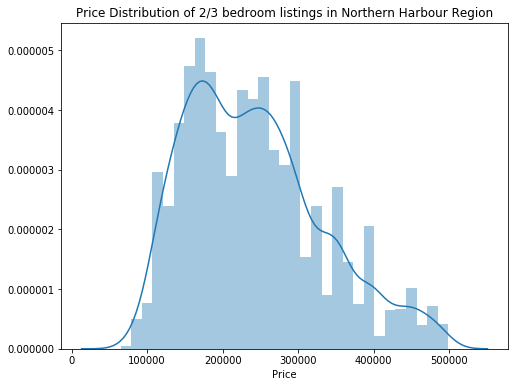

In [152]:
plt.figure(figsize=(8,6))
sns.distplot(df_finished['Price'])
plt.title('Price Distribution of 2/3 bedroom listings in Northern Harbour Region')
plt.show()

### Maybe we would also like to subset the data further, maybe we only want to look at apartment that have lift included or with a balcony, depends on what you are looking for

### We may also delegate 'points' to apartments that are in a desired price range and if they have a balcony or garage, or if they're in a more preferred location, and then we can see which listings have the higher points. 

## Recent listings

Considering that these listings start from the year 2015, there is a chance that these listings are no longer in the market. There is also a high chance that the listings prices have been changed, leading to duplicates of the same data but with a different timestamp. Lets return listings of 2019 of 2/3 bedroom finished apartments in the Northern Harbour area

In [153]:
#df_north = df_north.set_index('Date')
df_north = df_north.drop(['index','month'],axis=1)

In [154]:
df_finished['year'] = pd.DatetimeIndex(df_finished['Date']).year
df_finished_recent = df_finished.loc[df_finished['year'] == 2019]
df_finished_recent

,index,Description,Date,Price,month,year
month,,,,,,
10,95377,GŻIRA. Two bedroom fully furnished apartment w...,2019-10-23,259000.0,10,2019
10,95416,"ST JULIANS. Three bedroom, furnished apartment...",2019-10-23,240000.0,10,2019
10,95440,BIRKIRKARA. Three bedroom finished penthouse i...,2019-10-23,339000.0,10,2019
10,95453,"BIRKIRKARA, old church area. New, two / three ...",2019-10-23,220000.0,10,2019
10,95454,"BIRKIRKARA, Ta' Paris. Two bedroom penthouse. ...",2019-10-23,218000.0,10,2019
10,95462,ST VENERA. Three bedroom / two terraces finish...,2019-10-23,230000.0,10,2019
10,95467,"SWIEQI. Brand new, fully finished two bedroom ...",2019-10-23,255000.0,10,2019
10,95470,"SWIEQI. New, highly finished apartment. Kitche...",2019-10-23,290000.0,10,2019
10,95471,"SWIEQI. Three bedroom, 120sqm fully furnished ...",2019-10-23,350000.0,10,2019


223 listings in october and november of 2019

In [155]:
df_finished_recent.mean() #2019 only

index     95656.282051
Price    293615.384615
month        10.461538
year       2019.000000
dtype: float64

In [156]:
df_finished.mean() #2015-2019

index     50574.400425
Price    241956.523589
month         6.433681
year       2016.655259
dtype: float64

#### It seems that the mean price of recent listings is quite higher than the overall mean of 2/3 bedroom finished apartments in the NH from 2015-2019

## Some conclusions about the data


Mean Prices of properties in Sliema are higher than Birkirkara

In [157]:
df_sliema = df[df['Description'].str.contains("SLIEMA")]
df_birkirkara = df[df['Description'].str.contains("BIRKIRKARA")]
print("Mean listing prices of Sliema: ",df_sliema['Price'].mean())
print("Mean listing prices of Birkirkara: ",df_birkirkara['Price'].mean())

Mean listing prices of Sliema:  488496.5430107527
Mean listing prices of Birkirkara:  231368.08136300417


#### Confirmed

The percentage of farmhouses listings in Gozo is higher than the the percentage of farmhouses in Northern Harbour

In [158]:
df_gozo = df[df['Description'].str.contains("GOZO")]
df_gozo_farm = df_gozo[df_gozo['Description'].str.contains("farmhouse|Farmhouse")]
dfnorth_farm = df_north[df_north['Description'].str.contains("farmhouse|Farmhouse")]
print("Percentage value of farmhouses in Gozo", len(df_gozo_farm)/len(df_gozo
                                                                     ))
print("Percentage value of farmhouses in Northern Harbour", len(dfnorth_farm)/len(df_north))

Percentage value of farmhouses in Gozo 0.0966236191068928
Percentage value of farmhouses in Northern Harbour 0.0006993985172751433


#### Confirmed

The number of listings in Gozo is less than 10% of all published listings

In [159]:
diff_ratio = (len(df_gozo)/len(df))*100
print("Gozo listings cover %.2f" %(diff_ratio),"% of all published lsitings")


Gozo listings cover 6.69 % of all published lsitings


The mean price of apartments in Sliema has risen at least 40% from early 2015 to late 2018

In [160]:
df_sliema_apart = df_sliema[df_sliema['Description'].str.contains("apartment")]
df_sliema_apart = df_sliema_apart.set_index('Date')

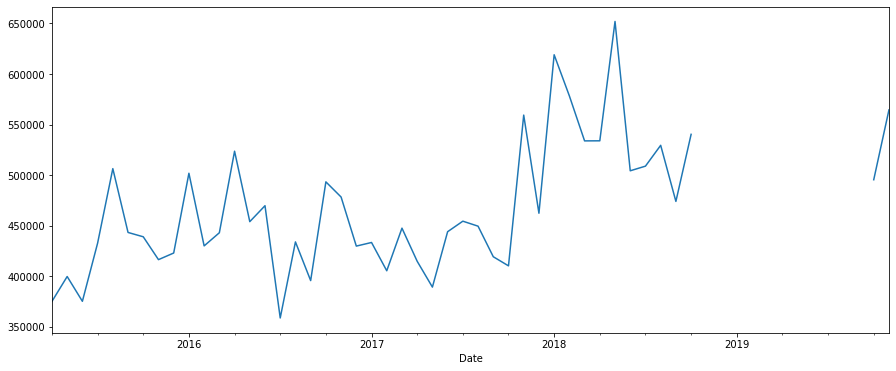

In [161]:
z = df_sliema_apart['Price'].resample('MS').mean()
z.plot(figsize=(15, 6))
plt.show()

In [162]:
z

Date
2015-04-01    375137.931034
2015-05-01    399728.504673
2015-06-01    375236.597938
2015-07-01    432707.142857
2015-08-01    506389.380531
2015-09-01    443299.019608
2015-10-01    439016.666667
2015-11-01    416419.354839
2015-12-01    422971.698113
2016-01-01    501831.325301
2016-02-01    430012.345679
2016-03-01    443005.319149
2016-04-01    523628.318584
2016-05-01    453992.187500
2016-06-01    469741.573034
2016-07-01    358746.478873
2016-08-01    433952.380952
2016-09-01    395709.302326
2016-10-01    493327.338129
2016-11-01    478320.422535
2016-12-01    429809.333333
2017-01-01    433382.242991
2017-02-01    405426.966292
2017-03-01    447550.000000
2017-04-01    414800.000000
2017-05-01    389272.058824
2017-06-01    444032.786885
2017-07-01    454444.444444
2017-08-01    449511.111111
2017-09-01    419297.619048
2017-10-01    410277.777778
2017-11-01    559328.358209
2017-12-01    462295.744681
2018-01-01    618982.758621
2018-02-01    578311.475410
2018-03-01    5

In [163]:
late_2018 = 540311
early_2015 = 375137
arith_change = late_2018 - early_2015
print("Pecentage increase of the mean price of apartments in Sliema is:", (arith_change/early_2015)*100)

Pecentage increase of the mean price of apartments in Sliema is: 44.030314258524214


#### Confirmed

If we gather all listings with the word 'luxurious' in the description, we will see listings going up to a €1,000,000

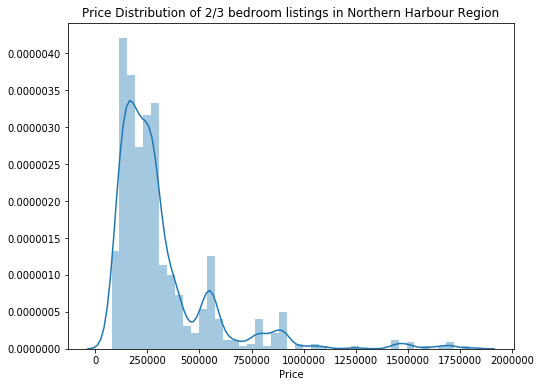

In [164]:
df_luxury = df[df['Description'].str.contains("luxurious")]
plt.figure(figsize=(8,6))
sns.distplot(df_luxury['Price'])
plt.title('Price Distribution of 2/3 bedroom listings in Northern Harbour Region')
plt.show()

## Statistical Test

Lets look at listings in St Venera & Birkirkara and see if they have similarities

In [165]:
df_north_stvenera = df_finished[df_finished['Description'].str.contains("ST VENERA")]
df_north_birkirkara = df_finished[df_finished['Description'].str.contains("BIRKIRKARA")]
print(df_north_stvenera.shape)
print(df_north_birkirkara.shape)

(408, 6)
(439, 6)


In [166]:
df_north_stvenera_a =df_north_stvenera['Price'].sort_values()
df_north_birkirkara_a=df_north_birkirkara['Price'].sort_values()

In [167]:
stat, p = stats.normaltest(df_north_stvenera_a)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')
print('-----------------------------------------------')    
stat, p = stats.normaltest(df_north_birkirkara_a)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=30.158, p=0.000
Data does not look Gaussian (reject H0)
-----------------------------------------------
Statistics=61.211, p=0.000
Data does not look Gaussian (reject H0)


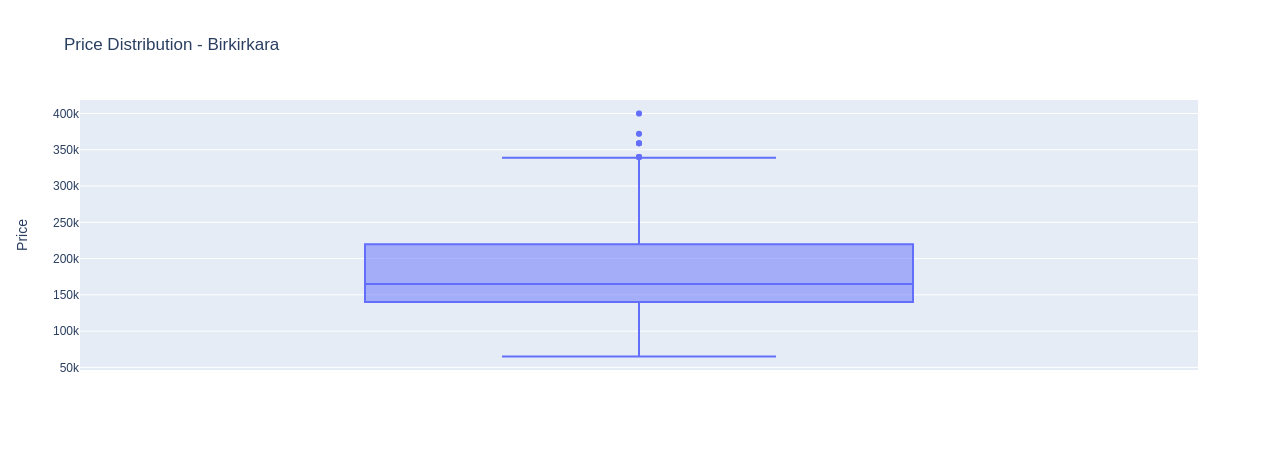

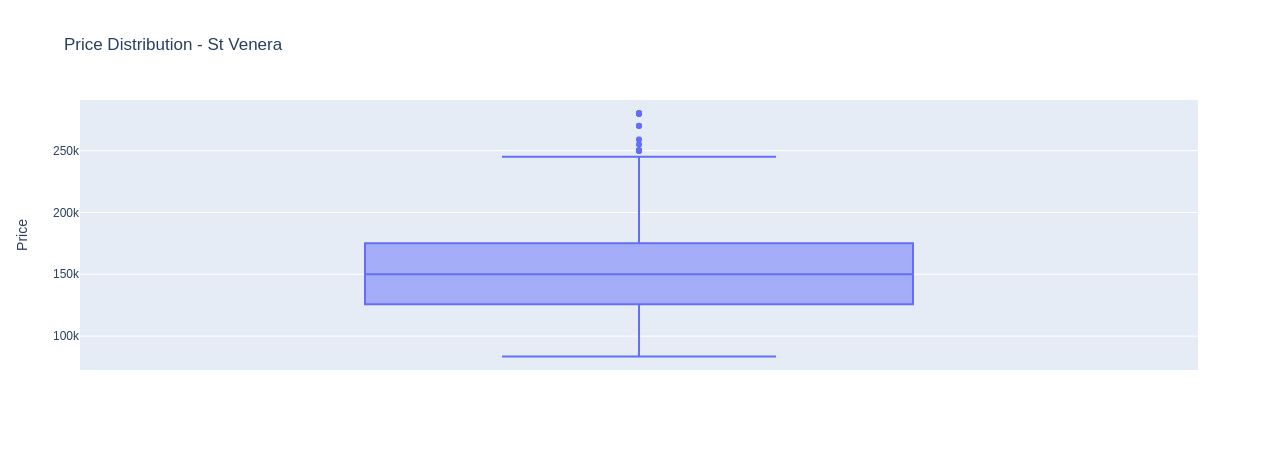

In [168]:
import plotly.express as px
fig = px.box(df_north_birkirkara, y="Price", title='Price Distribution - Birkirkara')
fig.show()
fig = px.box(df_north_stvenera
             , y="Price", title='Price Distribution - St Venera')
fig.show()

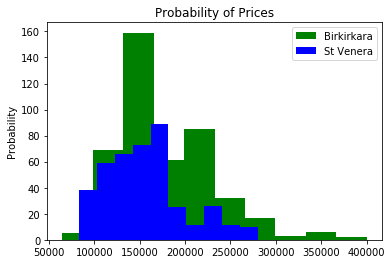

In [169]:
plt.hist(df_north_birkirkara_a, color='g', label='Birkirkara')
plt.hist(df_north_stvenera_a,  color='b', label='St Venera')
plt.gca().set(title='Probability of Prices', ylabel='Probability')

plt.legend();

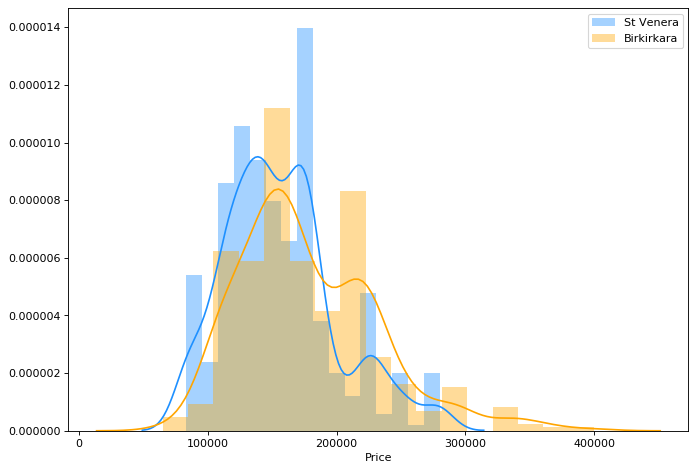

In [170]:
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df_north_stvenera_a, color="dodgerblue", label="St Venera")
sns.distplot(df_north_birkirkara_a, color="orange", label="Birkirkara")
plt.legend();

### Our distributions have a different shape, if our distributions' shape was similar, we can compare the medians. But since they're not we can compare the mean ranks

### Data does not exhibit normality, therefore we will look to apply non-parametric tests to compare the medians

The samples are:
- Continuous scale
- Independent from each other
- Non-normally distributed
- Different in size

### Tests that can be used are Kruskal-Wallis and Mann-Whitney U tests. Kruskal-Wallis are oftenly used for 2 or more independent groups while Mann-Whitney is used for two groups.

Mann-Whitney U test Assumptions:
- Dependent variable (Price) should be measured at the ordinal or continuous level
- Independent variable should consist of two  categorical, independent groups ( St venera, birkirkara )
- Samples can be different in size
- Sample distribution shape is similar ( Violated )

Since the last assumption is violated, we can only compare mean ranks rather than the medians


In [171]:
stat, p = stats.mannwhitneyu(df_north_stvenera_a, df_north_birkirkara_a)
print('P value:  %.3f '  %(p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

P value:  0.000 
Different distribution (reject H0)


## Spearman Correlation

In [249]:
df_maisonette1 = df_maisonette[df_maisonette['Description'].str.contains("SWIEQI")]
df_maisonette2 = df_maisonette[df_maisonette['Description'].str.contains("SLIEMA")]
df_maisonette1 = df_maisonette1[df_maisonette1['Price']<500000]
df_maisonette2 = df_maisonette2[df_maisonette2['Price']<500000]
df_maisonette1 = df_maisonette1.set_index('Date')
df_maisonette2 = df_maisonette2.set_index('Date')

In [250]:
c = df_maisonette1['Price'].iloc[:70] # 1st 15 days
d = df_maisonette2['Price'].iloc[:70]
stats.spearmanr(c,d)
# some correlation but overall quite neutral

SpearmanrResult(correlation=0.20394087243975995, pvalue=0.09037616250425821)

# Linear Regression

#### The objective is to predict price listings of properties given some features.
- TARGET VALUE = PRICE
- FEATURES: location, property type(apartment), no of bedrooms, optional garage, luxurious

In [110]:
df_apartments = df[df['Description'].str.contains("apartment|Apartment")] # original 

df_apartments = df_apartments[df_apartments['Price']<500000]

In [111]:
a = df_apartments.Description.str.split(".",expand=True) 
df_apartments['Location'] = a[0]
df_apartments['Listing'] = a[1]+a[2]

In [112]:
df_apartments

,index,Description,Date,Price,month,Location,Listing
month,,,,,,,
4,1,"ST PAUL' S BAY. Seafront, new finished three b...",2015-04-23,250000.0,4,ST PAUL' S BAY,"Seafront, new finished three bedroom apartmen..."
4,2,QAWRA. Bargain. One / two / three bedroom mais...,2015-04-23,75500.0,4,QAWRA,Bargain One / two / three bedroom maisonettes...
4,3,MARSASCALA. Finished two bedroom apartment clo...,2015-04-23,85000.0,4,MARSASCALA,Finished two bedroom apartment close to St Th...
4,6,"GOZO, GĦAJNSIELEM. Elevated groundfloor apartm...",2015-04-23,90500.0,4,"GOZO, GĦAJNSIELEM",Elevated groundfloor apartment being sold in ...
4,7,"BALZAN. Finished, large three bedroom apartmen...",2015-04-23,152000.0,4,BALZAN,"Finished, large three bedroom apartment Must ..."
4,12,VALLETTA. Eight room townhouse with permits to...,2015-04-23,390000.0,4,VALLETTA,Eight room townhouse with permits to convert ...
4,13,VALLETTA. Converted top floor apartment with r...,2015-04-23,295000.0,4,VALLETTA,Converted top floor apartment with roof terra...
4,17,TARXIEN. Bargain. One / two / three bedroom ma...,2015-04-23,75000.0,4,TARXIEN,Bargain One / two / three bedroom maisonettes...
4,18,"GOZO, MARSALFORN. Bargain, owner leaving islan...",2015-04-23,70000.0,4,"GOZO, MARSALFORN","Bargain, owner leaving island Two bedroom, fu..."


In [113]:
df_apartments = df_apartments.drop(['Description','index','month'],axis=1)

df_apartments = df_apartments.reset_index()



In [114]:
df_apartments = df_apartments.drop(['month'],axis=1)


In [115]:
df_apartments['Location'] = df_apartments['Location'].str.upper() 
df_apartments['Location'] = df_apartments['Location'].str.replace('Ż', 'Z')
df_apartments['Location'] = df_apartments['Location'].str.replace('Ħ', 'H')
df_apartments['Location'] = df_apartments['Location'].str.replace('Ġ', 'G')

df_apartments['Location'] = df_apartments['Location'].str.replace('PROPERTY FOR SALE', '')
df_apartments['Location'] = df_apartments['Location'].str.replace('ĦARGOCHĦUR', 'ĦAMRUN')
df_apartments['Location'] = df_apartments['Location'].str.replace('XGOCHĦAJRA', 'XGĦAJRA')
df_apartments['Location'] = df_apartments['Location'].str.replace('TIGNÉOCH POINT', 'TIGNÉ POINT')
df_apartments['Location'] = df_apartments['Location'].str.replace('ŻEBBIEGH', 'ZEBBIEGH')
df_apartments['Location'] = df_apartments['Location'].str.replace('ŻEBBIEGOCHĦ', 'ZEBBIEGH')
df_apartments['Location'] = df_apartments['Location'].str.replace('ŻEBBIEGĦ', 'ZEBBIEGH')
df_apartments['Location'] = df_apartments['Location'].str.replace('ŻEBBIEĦ', 'ZEBBIEGH')
df_apartments['Location'] = df_apartments['Location'].str.replace('ŻEBBIĠĦ', 'ZEBBIEGH')
df_apartments['Location'] = df_apartments['Location'].str.replace('ŻURRIEQ', 'ZURRIEQ')
df_apartments['Location'] = df_apartments['Location'].str.replace('ŻURRIEQ ', 'ZURRIEQ')
df_apartments['Location'] = df_apartments['Location'].str.replace('BALLUTA', 'BALLUTA')
df_apartments['Location'] = df_apartments['Location'].str.replace('BALLUTA', 'BALLUTA')
df_apartments['Location'] = df_apartments['Location'].str.replace('BALLUTA BAY', 'BALLUTA')
df_apartments['Location'] = df_apartments['Location'].str.replace('BALLUTA BAY AREA', 'BALLUTA')
df_apartments['Location'] = df_apartments['Location'].str.replace('BALLUTA AREA', 'BALLUTA')
df_apartments['Location'] = df_apartments['Location'].str.replace('BALZAN', 'BALZAN')
df_apartments['Location'] = df_apartments['Location'].str.replace('BALZAN', 'BALZAN')
df_apartments['Location'] = df_apartments['Location'].str.replace(' RABAT', 'RABAT')


In [116]:
b = df_apartments.Location.str.split(",",expand=True) 
df_apartments['Location'] = b[0]

c = df_apartments.Location.str.split("/",expand=True) 
df_apartments['Location'] = c[0]

d = df_apartments.Location.str.split("(",expand=True) 
df_apartments['Location'] = d[0]


In [117]:
df_apartments = df_apartments.dropna()

In [126]:
one_bed = df_apartments[df_apartments.Listing.str.contains("one bedroom")]
one_bed['Number bed'] = "1"
two_bed = df_apartments[df_apartments.Listing.str.contains("two bedroom")]
two_bed['Number bed'] = "2"
three_bed = df_apartments[df_apartments.Listing.str.contains("three bedroom")]
three_bed['Number bed'] = "3"
df_ML = pd.concat([one_bed,two_bed,three_bed])
df_ML = df_ML.reset_index()
df_ML = df_ML.drop(['Listing','index'],axis=1)
df_ML

,Date,Price,Location,Number bed
0,2015-04-29,170000.0,SLIEMA,1
1,2015-04-29,120000.0,ST JULIANS,1
2,2015-04-29,400000.0,ST JULIANS,1
3,2015-04-29,210000.0,PACEVILLE,1
4,2015-04-29,282000.0,PORTOMASO,1
5,2015-04-29,70000.0,MARSASCALA,1
6,2015-05-12,64000.0,MARSASCALA,1
7,2015-05-12,350000.0,PORTOMASO,1
8,2015-05-12,72000.0,SAN GWANN,1
9,2015-05-12,95000.0,GZIRA,1


In [127]:
df_ML = pd.get_dummies(df_ML, columns =['Number bed','Location'])
df_ML

,Date,Price,Number bed_1,Number bed_2,Number bed_3,Location_ SLIEMA,Location_ ST JULIANS,Location_ ST PAUL' S BAY,Location_ ST VENERA,Location_ SWATAR,...,Location_ZURRIEQ,Location_ZURRIEQ,Location_{OLE_LINK1HAXAQ,Location_{_GOBACK LARGE NEW APARTMENTS,Location_{_HLK23845000 WINDSOR TERRACE,Location_{_HLK479148992,Location_{_HLK479148992 GHADIRA AREA,Location_{_HLK479148992BALLUTA,Location_{_HLK491179585 UNIQUE PROPERTY,Location_{_HLK503627286 BEING BUILT
0,2015-04-29,170000.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-04-29,120000.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015-04-29,400000.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015-04-29,210000.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015-04-29,282000.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2015-04-29,70000.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2015-05-12,64000.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2015-05-12,350000.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2015-05-12,72000.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2015-05-12,95000.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
# REMOVE PROPERTY FOR SALE, ŻIRA INTO GZIRA, ŻEBBIEĦ, ŻEBBIĠĦ, ŻURRIEQ (St Catherine Street), CAPS

for col in df_ML.columns: 
    print(col)

Date
Price
Number bed_1
Number bed_2
Number bed_3
Location_
	
		SLIEMA
Location_
	
		ST JULIANS
Location_
	
		ST PAUL' S BAY
Location_
	
		ST VENERA
Location_
	
		SWATAR
Location_
	
		SWIEQI
Location_
	
		TA' XBIEX
Location_
	
		TAL-IBRAG
Location_
	
		TARXIEN
Location_
	
		TARXIEN 
Location_
	
		THE VILLAGE
Location_
	
		TIGNÉ POINT AREA
Location_
	
		VALLETTA
Location_
	
		XEMXIJA
Location_
	
		XEMXIJA HEIGHTS
Location_
	
		XGHAJRA
Location_
	
		ZABBAR
Location_
	
		ZEBBIEGH
Location_
	
		ZEBBIEGOCHH
Location_
	
		ZEBBUG
Location_
	
		ZEJTUN
Location_
	
		ZURRIEQ
Location_
 
BALZAN
Location_
 
BIRKIRKARA
Location_
 
BUGIBBA
Location_
 
FGURA
Location_
 
FLORIANA
Location_
 
GHARGHUR
Location_
 
GHAXAQ
Location_
 
GOZO
Location_
 
GZIRA
Location_
 
HAMRUN
Location_
 
IKLIN
Location_
 
KALKARA
Location_
 
MADLIENA
Location_
 
MARSASCALA
Location_
 
MELLIEHA
Location_
 
MOSTA
Location_
 
MQABBA
Location_
 
MSIDA
Location_
 
NAXXAR
Location_
 
PAOLA
Location_
 
PIETOCHÀ
Location_
 
PIETÀ

Too many columns

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 

from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()


In [137]:
X = df_ML.drop(['Price','Date'],axis=1)
y = df_ML['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train = mm_scaler.fit_transform(X_train)
X_test = mm_scaler.transform(X_test)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
y_pred = regressor.predict(X_test)

In [139]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
1985,150000.0,151376.0
12512,155000.0,226284.0
10664,85000.0,151552.0
3093,127000.0,151376.0
15554,232000.0,233976.0
15464,120000.0,132932.0
9507,138500.0,166992.0
4379,160000.0,309580.0
4401,205000.0,217348.0
7673,118000.0,166880.0


In [141]:
error = mean_squared_error(y_test, y_pred)
print('Test Root MSE: %.3f' % np.sqrt(error))

Test Root MSE: 349914759395760.000


### Problems with our model:
- Needs more features (garage, balcony, views, floor level, etc)
- Needs further cleaning

# ARIMA - Time Series Forecasting

In [133]:
from statsmodels.tsa.arima_model import ARIMA

Other techniques are applicable such as LSTM(RNN), Exponential Smoothing, Random Forest Regressor, Prophet, etc

#### The goal is to try to predict future mean prices of 2/3 bedroom apartments in Northern Harbour. Features of our data:
- All data of 2/3 bedroom apartments in Northern Harbour
- Only listings less than 500k were considered

In [134]:
df_predict = df_finished
df_predict = df_finished.set_index('Date')
"""df_finished = df_finished.drop(['year','Description'],axis=1)"""

"df_finished = df_finished.drop(['year','Description'],axis=1)"

In [135]:
y = df_predict['Price'].resample('MS').mean()
y 

Date
2015-04-01    216787.878788
2015-05-01    206339.759036
2015-06-01    195286.363636
2015-07-01    185725.496689
2015-08-01    218973.076923
2015-09-01    227314.851485
2015-10-01    217476.190476
2015-11-01    220204.545455
2015-12-01    211305.607477
2016-01-01    209115.189873
2016-02-01    207284.431138
2016-03-01    227341.085271
2016-04-01    218607.272727
2016-05-01    217324.817518
2016-06-01    236710.738255
2016-07-01    236678.703704
2016-08-01    253303.546099
2016-09-01    233094.736842
2016-10-01    235136.138614
2016-11-01    235178.571429
2016-12-01    230620.430108
2017-01-01    249923.008850
2017-02-01    259860.824742
2017-03-01    276810.526316
2017-04-01    252481.481481
2017-05-01    263394.400000
2017-06-01    287915.254237
2017-07-01    236363.636364
2017-08-01    269120.689655
2017-09-01    257775.000000
2017-10-01    236148.148148
2017-11-01    283101.265823
2017-12-01    254573.508772
2018-01-01    281321.428571
2018-02-01    286762.500000
2018-03-01    2

In [136]:
y = y.iloc[0:54]
y = y.dropna()
y

Date
2015-04-01    216787.878788
2015-05-01    206339.759036
2015-06-01    195286.363636
2015-07-01    185725.496689
2015-08-01    218973.076923
2015-09-01    227314.851485
2015-10-01    217476.190476
2015-11-01    220204.545455
2015-12-01    211305.607477
2016-01-01    209115.189873
2016-02-01    207284.431138
2016-03-01    227341.085271
2016-04-01    218607.272727
2016-05-01    217324.817518
2016-06-01    236710.738255
2016-07-01    236678.703704
2016-08-01    253303.546099
2016-09-01    233094.736842
2016-10-01    235136.138614
2016-11-01    235178.571429
2016-12-01    230620.430108
2017-01-01    249923.008850
2017-02-01    259860.824742
2017-03-01    276810.526316
2017-04-01    252481.481481
2017-05-01    263394.400000
2017-06-01    287915.254237
2017-07-01    236363.636364
2017-08-01    269120.689655
2017-09-01    257775.000000
2017-10-01    236148.148148
2017-11-01    283101.265823
2017-12-01    254573.508772
2018-01-01    281321.428571
2018-02-01    286762.500000
2018-03-01    2

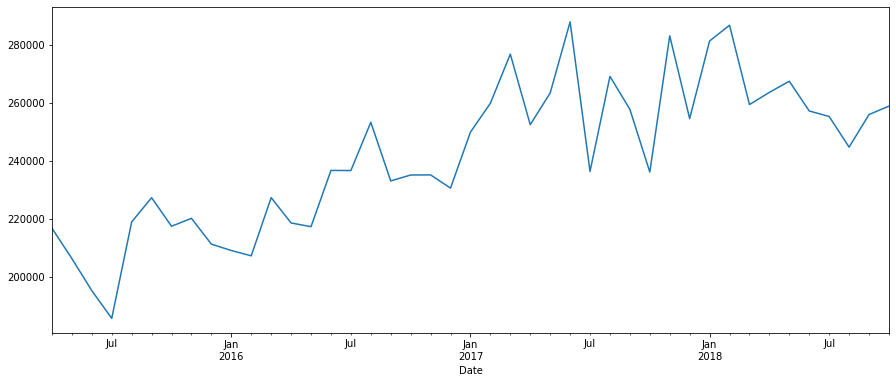

In [137]:
y.plot(figsize=(15, 6))
plt.show()

### Sharp rise throughout the years, no surprise considering the foreigner influx

- https://www.maltachamber.org.mt/en/malta-has-one-of-the-highest-expat-populations-in-the-eu
- https://nso.gov.mt/en/publicatons/Publications_by_Unit/Documents/02_Regional_Statistics_(Gozo_Office)/Regional%20Statistics%20MALTA%202019%20Edition.pdf

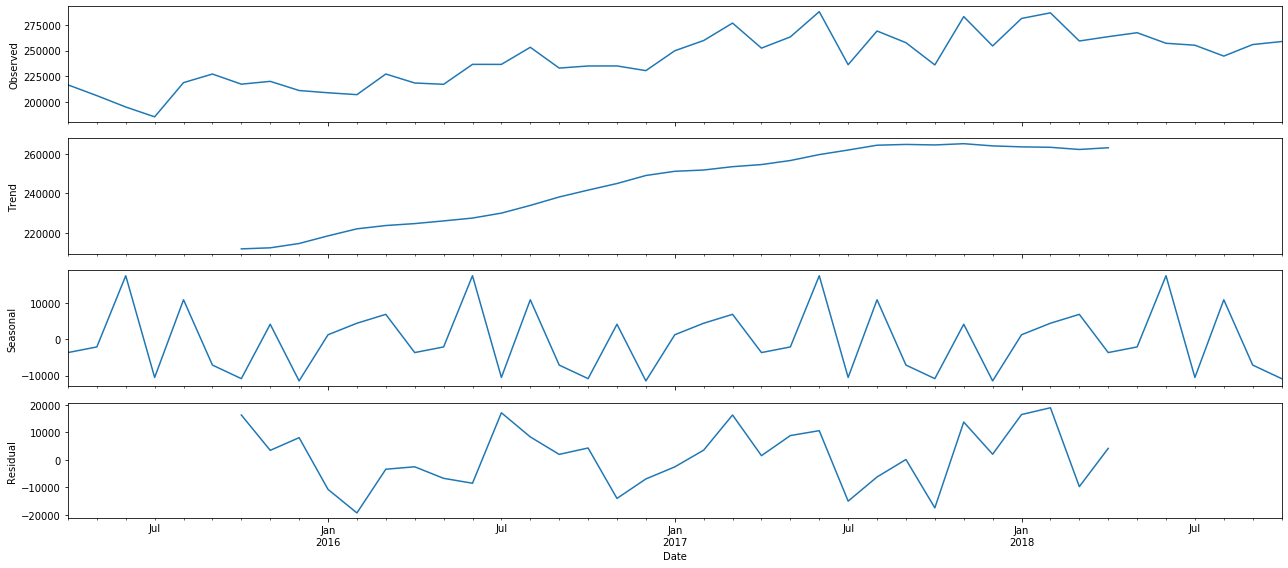

In [139]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

We can see an upward trend (as expected), meaning the data is not stationary. There seems to be a seasonality factor when it comes to pricing

#### What was tricky was what are the parameters and how to choose the appropriate order (p,d,q) for the model. It seems before any forecasting can be done, the data needs to be tested for stationarity (Dickey fuller test), which I would conclude it is not from the trend depiction above. The order was chosen as (5,1,0), it would be ideal to do a grid search to find the most optimal hyperparameters for the model

In [178]:
from sklearn.metrics import mean_squared_error #avg of squared errors

predicted=258680.662231, expected=236148.148148
predicted=276378.771142, expected=283101.265823
predicted=260519.821154, expected=254573.508772
predicted=262507.255631, expected=281321.428571
predicted=285999.818020, expected=286762.500000
predicted=258459.336547, expected=259414.525140
predicted=287144.465685, expected=263618.421053
predicted=264503.264131, expected=267450.819672
predicted=268038.674012, expected=257209.051724
predicted=281258.623285, expected=255306.451613
predicted=264279.986608, expected=244746.987952
predicted=252562.642248, expected=255968.750000
predicted=260864.189560, expected=258881.526104
Test Root MSE: 14394.874


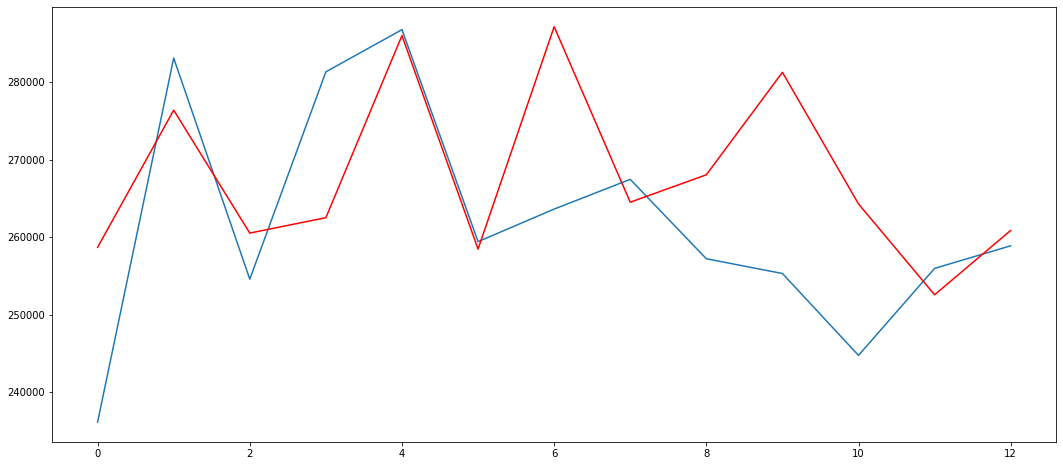

In [181]:
data = y.values
split = int(len(X) * 0.70) #70:30 train:test ratio
train, test = data[0:split], data[split:len(X)]
history = [x for x in train]
predictions = list()
mse = list()
for i in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    result = output[0]
    predictions.append(result)
    expected = test[i]
    history.append(expected)
    print('predicted=%f, expected=%f' % (result, expected))
error = mean_squared_error(test, predictions)
print('Test Root MSE: %.3f' % np.sqrt(error))
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

#### Root mean squared error of our forecast is 14395 euro. 